# Introduction

<center><img src="https://i.imgur.com/9hLRsjZ.jpg" height=400></center>

This dataset was scraped from [nextspaceflight.com](https://nextspaceflight.com/launches/past/?page=1) and includes all the space missions since the beginning of Space Race between the USA and the Soviet Union in 1957!

### Install Package with Country Codes

In [590]:
%pip install iso3166

### Upgrade Plotly

Run the cell below if you are working with Google Colab.

In [591]:
%pip install --upgrade plotly

### Import Statements

In [592]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# These might be helpful:
from iso3166 import countries
from datetime import datetime, timedelta

### Notebook Presentation

In [593]:
pd.options.display.float_format = '{:,.2f}'.format

### Load the Data

In [594]:
df_data = pd.read_csv('mission_launches.csv',parse_dates=['Date'])

# Preliminary Data Exploration

* What is the shape of `df_data`? 
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [595]:
df_data.shape

(4324, 9)

In [596]:
df_data.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Organisation', 'Location', 'Date',
       'Detail', 'Rocket_Status', 'Price', 'Mission_Status'],
      dtype='object')

In [597]:
df_data.head()

,Unnamed: 0,Unnamed: 0.1,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07 05:12:00+00:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06 04:01:00+00:00,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA",2020-08-04 23:57:00+00:00,Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30 21:25:00+00:00,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30 11:50:00+00:00,Atlas V 541 | Perseverance,StatusActive,145.0,Success


## Data Cleaning - Check for Missing Values and Duplicates

Consider removing columns containing junk data. 

In [598]:
df_data.drop(['Unnamed: 0','Unnamed: 0.1'],axis=1,inplace=True)

In [599]:
df_data.head(10)

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07 05:12:00+00:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06 04:01:00+00:00,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA",2020-08-04 23:57:00+00:00,Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30 21:25:00+00:00,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30 11:50:00+00:00,Atlas V 541 | Perseverance,StatusActive,145.0,Success
5,CASC,"LC-9, Taiyuan Satellite Launch Center, China",2020-07-25 03:13:00+00:00,"Long March 4B | Ziyuan-3 03, Apocalypse-10 & N...",StatusActive,64.68,Success
6,Roscosmos,"Site 31/6, Baikonur Cosmodrome, Kazakhstan",2020-07-23 14:26:00+00:00,Soyuz 2.1a | Progress MS-15,StatusActive,48.5,Success
7,CASC,"LC-101, Wenchang Satellite Launch Center, China",2020-07-23 04:41:00+00:00,Long March 5 | Tianwen-1,StatusActive,NaN,Success
8,SpaceX,"SLC-40, Cape Canaveral AFS, Florida, USA",2020-07-20 21:30:00+00:00,Falcon 9 Block 5 | ANASIS-II,StatusActive,50.0,Success
9,JAXA,"LA-Y1, Tanegashima Space Center, Japan",2020-07-19 21:58:00+00:00,H-IIA 202 | Hope Mars Mission,StatusActive,90.0,Success


In [600]:
df_data.isna().sum()

Organisation         0
Location             0
Date                 0
Detail               0
Rocket_Status        0
Price             3360
Mission_Status       0
dtype: int64

In [601]:
df_data.duplicated().sum()

1

In [602]:
df_data.drop_duplicates(inplace=True)

In [603]:
df_data.duplicated().sum()

0

## Descriptive Statistics

In [604]:
df_data.describe()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
count,4323,4323,4323,4323,4323,963,4323
unique,56,137,4319,4278,2,56,4
top,RVSN USSR,"Site 31/6, Baikonur Cosmodrome, Kazakhstan",1991-08-25 08:40:00+00:00,Cosmos-3MRB (65MRB) | BOR-5 Shuttle,StatusRetired,450.0,Success
freq,1777,235,2,6,3534,136,3878


In [605]:
type(df_data.Price[0])

str

In [606]:
df_data.Price = pd.to_numeric(df_data.Price.str.replace(',',''))


In [607]:
type(df_data.Price[0])

numpy.float64

In [608]:
df_data.Price.fillna(df_data.Price.median(),inplace=True)

In [609]:
df_data.head(10)

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07 05:12:00+00:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06 04:01:00+00:00,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA",2020-08-04 23:57:00+00:00,Starship Prototype | 150 Meter Hop,StatusActive,62.00,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30 21:25:00+00:00,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30 11:50:00+00:00,Atlas V 541 | Perseverance,StatusActive,145.00,Success
5,CASC,"LC-9, Taiyuan Satellite Launch Center, China",2020-07-25 03:13:00+00:00,"Long March 4B | Ziyuan-3 03, Apocalypse-10 & N...",StatusActive,64.68,Success
6,Roscosmos,"Site 31/6, Baikonur Cosmodrome, Kazakhstan",2020-07-23 14:26:00+00:00,Soyuz 2.1a | Progress MS-15,StatusActive,48.50,Success
7,CASC,"LC-101, Wenchang Satellite Launch Center, China",2020-07-23 04:41:00+00:00,Long March 5 | Tianwen-1,StatusActive,62.00,Success
8,SpaceX,"SLC-40, Cape Canaveral AFS, Florida, USA",2020-07-20 21:30:00+00:00,Falcon 9 Block 5 | ANASIS-II,StatusActive,50.00,Success
9,JAXA,"LA-Y1, Tanegashima Space Center, Japan",2020-07-19 21:58:00+00:00,H-IIA 202 | Hope Mars Mission,StatusActive,90.00,Success


# Number of Launches per Company

Create a chart that shows the number of space mission launches by organisation.

In [610]:
org_dis = df_data.groupby('Organisation',as_index=False).agg({'Mission_Status':'count'})
org_dis.sort_values('Mission_Status',inplace=True)
org_dis[-20:]

,Organisation,Mission_Status
28,Kosmotras,22
22,ISAS,30
45,Sea Launch,36
19,ILS,46
42,Roscosmos,55
23,ISRO,76
31,Lockheed,79
36,Northrop,83
32,MHI,84
46,SpaceX,100


In [611]:
fig = px.bar(x=org_dis.Mission_Status[-20:],y=org_dis.Organisation[-20:],orientation='h',title='Space Mission Launches by Organisation')
fig.update_layout(xaxis_title='Number of Space Mission', yaxis_title='Orgnisation')
fig.show()

# Number of Active versus Retired Rockets

How many rockets are active compared to those that are decomissioned? 

In [612]:
rs = df_data.Rocket_Status.value_counts()
rs

StatusRetired    3534
StatusActive      789
Name: Rocket_Status, dtype: int64

In [613]:
fig=px.pie(rs,values=rs.values,names=rs.index, color = rs.index,title='Number of Active Vs Retired Rockets')

fig.update_traces(textposition='inside', textinfo='percent+value')
fig.show()

# Distribution of Mission Status

How many missions were successful?
How many missions failed?

In [614]:
mission = df_data.Mission_Status.value_counts()
mission

Success              3878
Failure               339
Partial Failure       102
Prelaunch Failure       4
Name: Mission_Status, dtype: int64

In [615]:
fig=px.pie(mission,values=mission.values,names=mission.index, color = mission.index,hole=0.6,title='Distribution of Mission Status')
fig.update_traces(textposition='inside', textinfo='percent+value')
fig.show()

# How Expensive are the Launches? 

Create a histogram and visualise the distribution. The price column is given in USD millions (careful of missing values). 

In [616]:
price = df_data.Price.value_counts()
price

62.00       3401
450.00       136
200.00        75
40.00         55
30.80         38
109.00        37
50.00         34
64.68         34
90.00         32
29.75         32
41.80         31
48.50         26
29.15         25
31.00         22
29.00         22
59.00         22
69.70         17
65.00         16
35.00         16
21.00         16
37.00         15
56.50         15
164.00        15
7.50          14
47.00         13
1,160.00      13
25.00         12
350.00        11
153.00        11
45.00         10
5.30           9
112.50         9
123.00         8
80.00          7
145.00         7
120.00         7
85.00          7
115.00         6
59.50          5
7.00           5
46.00          5
136.60         4
63.23          4
140.00         3
133.00         3
190.00         3
130.00         3
135.00         2
5,000.00       2
39.00          2
55.00          1
15.00          1
20.14          1
20.00          1
12.00          1
28.30          1
Name: Price, dtype: int64

In [617]:
fig=px.histogram(price, x=price.index,y=price.values, nbins=30,title='How Expensive are the Launches?')
fig.update_layout(xaxis_title="Expense",yaxis_title='count')
fig.show()


# Use a Choropleth Map to Show the Number of Launches by Country

* Create a choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/)
* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map. 
* You'll need to extract a `country` feature as well as change the country names that no longer exist.

Wrangle the Country Names

You'll need to use a 3 letter country code for each country. You might have to change some country names.

* Russia is the Russian Federation
* New Mexico should be USA
* Yellow Sea refers to China
* Shahrud Missile Test Site should be Iran
* Pacific Missile Range Facility should be USA
* Barents Sea should be Russian Federation
* Gran Canaria should be USA


You can use the iso3166 package to convert the country names to Alpha3 format.

In [ ]:
def extractCountry(item):
  item = item.split(',')
  return item[-1].strip()

df_data['Place'] = df_data.Location.apply(extractCountry)
df_data.head()




In [619]:
df_data.Place.value_counts()

Russia                            1395
USA                               1344
Kazakhstan                         701
France                             303
China                              267
Japan                              126
India                               76
Pacific Ocean                       36
New Zealand                         13
Iran                                13
Israel                              11
Kenya                                9
Australia                            6
North Korea                          5
New Mexico                           4
South Korea                          3
Barents Sea                          3
Brazil                               3
Gran Canaria                         2
Pacific Missile Range Facility       1
Yellow Sea                           1
Shahrud Missile Test Site            1
Name: Place, dtype: int64

In [620]:
def changeName(item):
  if item =='Russia' or item =='Barents Sea': return 'Russian Federation'
  elif item == 'New Mexico' or item =='Pacific Missile Range Facility' or item =='Gran Canaria' or item =='Pacific Ocean': return 'USA'
  elif item =='Yellow Sea' : return 'China'
  elif item =='Shahrud Missile Test Site' or  item =='Iran': return 'IRN'
  elif item =='North Korea': return 'PRK'
  elif item =='South Korea' : return 'KOR'
  else: return item
df_data.Place = df_data.Place.apply(changeName)


In [621]:
from iso3166 import countries

In [655]:
df_data['ISO'] = df_data['Place'].apply(lambda x:countries.get(x).alpha3)


In [657]:
df_data.sample(5)

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Place,ISO,launch_year,launch_time,launch_month
3932,General Dynamics,"LC-14, Cape Canaveral AFS, Florida, USA",1965-10-25,Atlas-SLV3 Agena-D | GATV 5002,StatusRetired,62.00,Failure,USA,USA,1965,1965-10,10
1583,Boeing,"SLC-17A, Cape Canaveral AFS, Florida, USA",1994-03-10,Delta II 7925 | USA-100 (GPS IIA-15)/SEDS-2,StatusRetired,62.00,Success,USA,USA,1994,1994-03,3
1939,RVSN USSR,"Site 32/1, Plesetsk Cosmodrome, Russia",1988-07-05,Tsyklon-3 | Okean 1,StatusRetired,62.00,Success,Russian Federation,RUS,1988,1988-07,7
4116,RVSN USSR,"Mayak-2, Kapustin Yar, Russia",1962-10-25,Cosmos-2I (63S1) | 1MS #2,StatusRetired,62.00,Failure,Russian Federation,RUS,1962,1962-10,10
606,CASC,"Site 901 (SLS-1), Jiuquan Satellite Launch Cen...",2013-06-11,Long March 2F/G | Shenzhou 10,StatusActive,62.00,Success,China,CHN,2013,2013-06,6


In [658]:
country_launch = df_data.groupby('ISO',as_index=False).agg({'Mission_Status':'count'})
country_launch.sort_values('Mission_Status',ascending=False,inplace=True)
country_launch

,ISO,Mission_Status
13,RUS,1398
14,USA,1387
8,KAZ,701
3,FRA,303
2,CHN,268
7,JPN,126
4,IND,76
5,IRN,14
11,NZL,13
6,ISR,11


In [659]:
fig = px.choropleth(country_launch, locations="ISO",
                    color="Mission_Status",
                    hover_name="ISO", # column to add to hover information
                    color_continuous_scale='matter')
fig.show()

# Use a Choropleth Map to Show the Number of Failures by Country


In [665]:
country_failure = df_data.drop(df_data[df_data.Mission_Status == 'Success'].index).groupby('ISO',as_index=False).agg({'Mission_Status':'count'})
country_failure.sort_values('Mission_Status',ascending=False,inplace=True)
country_failure

,ISO,Mission_Status
13,USA,166
8,KAZ,93
12,RUS,93
2,CHN,25
3,FRA,18
4,IND,13
7,JPN,13
5,IRN,9
0,AUS,3
1,BRA,3


In [666]:
fig = px.choropleth(country_failure, locations="ISO",
                    color="Mission_Status",
                    hover_name="ISO", # column to add to hover information
                    color_continuous_scale='matter')
fig.show()

# Create a Plotly Sunburst Chart of the countries, organisations, and mission status. 

In [667]:
#burst=df_data[['Organisation','Place','Mission_Status']]
burst_condition = df_data.groupby(['Place','Organisation']).agg({'Mission_Status':'value_counts'})
burst_condition.rename(columns={'Mission_Status':'Count'},inplace=True)
burst_condition.reset_index(inplace=True)
burst_condition

,Place,Organisation,Mission_Status,Count
0,Australia,AMBA,Success,1
1,Australia,CECLES,Failure,2
2,Australia,CECLES,Success,1
3,Australia,RAE,Failure,1
4,Australia,RAE,Success,1
...,...,...,...,...
127,USA,US Air Force,Partial Failure,2
128,USA,US Navy,Failure,14
129,USA,US Navy,Success,2
130,USA,US Navy,Partial Failure,1


In [668]:
fig = px.sunburst(burst_condition, path=['Place','Organisation','Mission_Status'],
                 title='Where do space race take place?',
                 values='Count')
fig.update_layout(coloraxis_showscale=False)
fig.show()

# Analyse the Total Amount of Money Spent by Organisation on Space Missions

In [629]:
money_org = df_data.groupby('Organisation',as_index=False).agg({'Price':'sum'})
money_org.sort_values('Price',inplace=True)
money_org[-20:]

,Organisation,Price
50,US Navy,"1,054.00"
22,ISAS,"1,860.00"
45,Sea Launch,"2,232.00"
23,ISRO,"2,735.00"
42,Roscosmos,"3,171.50"
19,ILS,"3,366.00"
36,Northrop,"3,930.00"
31,Lockheed,"4,682.00"
46,SpaceX,"5,506.00"
32,MHI,"6,446.50"


In [630]:
fig = px.bar(x=money_org.Price[-20:],y=money_org.Organisation[-20:],orientation='h',color=money_org.Price[-20:],title='Total Expense by Organisation')
fig.update_layout(xaxis_title='Expense', yaxis_title='Orgnisation')
fig.show()

# Analyse the Amount of Money Spent by Organisation per Launch

In [631]:
org_expense = df_data.groupby("Organisation",as_index=False).agg({'Price':'mean'})
org_expense.sort_values('Price',inplace=True)
org_expense

,Organisation,Price
41,Rocket Lab,7.50
53,Virgin Orbit,12.00
44,Sandia,15.00
12,EER,20.00
28,Kosmotras,29.00
23,ISRO,35.99
14,Eurockot,41.80
36,Northrop,47.35
7,CASC,48.31
46,SpaceX,55.06


In [632]:
fig = px.bar(x=org_expense.Price[-20:],y=org_expense.Organisation[-20:],orientation='h',color=org_expense.Price[-20:],title='Average Expense by Organisation')
fig.update_layout(xaxis_title='Average Expense', yaxis_title='Orgnisation')
fig.show()

# Chart the Number of Launches per Year

In [633]:
def getYear(item):
  return item.year

df_data['launch_year']=df_data.Date.apply(getYear)

In [634]:
number_of_launch = df_data.groupby('launch_year',as_index=False).agg({'Mission_Status':'count'})
number_of_launch[:10]

,launch_year,Mission_Status
0,1957,3
1,1958,28
2,1959,20
3,1960,39
4,1961,52
5,1962,82
6,1963,41
7,1964,60
8,1965,87
9,1966,101


In [635]:
fig = px.line(number_of_launch, x='launch_year',y='Mission_Status',title='Number of Launches per Year')
fig.update_layout(yaxis_title='Number',xaxis_title='Launch Year')
fig.show()

# Chart the Number of Launches Month-on-Month until the Present

Which month has seen the highest number of launches in all time? Superimpose a rolling average on the month on month time series chart. 

In [636]:
df_data.Date = df_data.Date.astype(str).str.split(' ')

In [637]:
def getNormalDate(item):

  return pd.to_datetime(item[0])
df_data.Date = df_data.Date.apply(getNormalDate)

In [638]:
df_data['launch_time'] = df_data.Date.dt.strftime('%Y-%m')
df_data.head()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Place,ISO,launch_year,launch_time
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,USA,USA,2020,2020-08
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China,CHN,2020,2020-08
2,SpaceX,"Pad A, Boca Chica, Texas, USA",2020-08-04,Starship Prototype | 150 Meter Hop,StatusActive,62.00,Success,USA,USA,2020,2020-08
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success,Kazakhstan,KAZ,2020,2020-07
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30,Atlas V 541 | Perseverance,StatusActive,145.00,Success,USA,USA,2020,2020-07


In [639]:
launch_monthly = df_data.groupby('launch_time',as_index=False).agg({'Mission_Status':'count'})
launch_monthly

,launch_time,Mission_Status
0,1957-10,1
1,1957-11,1
2,1957-12,1
3,1958-02,2
4,1958-03,3
...,...,...
742,2020-04,5
743,2020-05,9
744,2020-06,7
745,2020-07,14


In [640]:
roll_monthly = launch_monthly.set_index(keys='launch_time').rolling(window=12).mean()
roll_monthly

,Mission_Status
launch_time,
1957-10,NaN
1957-11,NaN
1957-12,NaN
1958-02,NaN
1958-03,NaN
...,...
2020-04,9.17
2020-05,9.17
2020-06,9.17


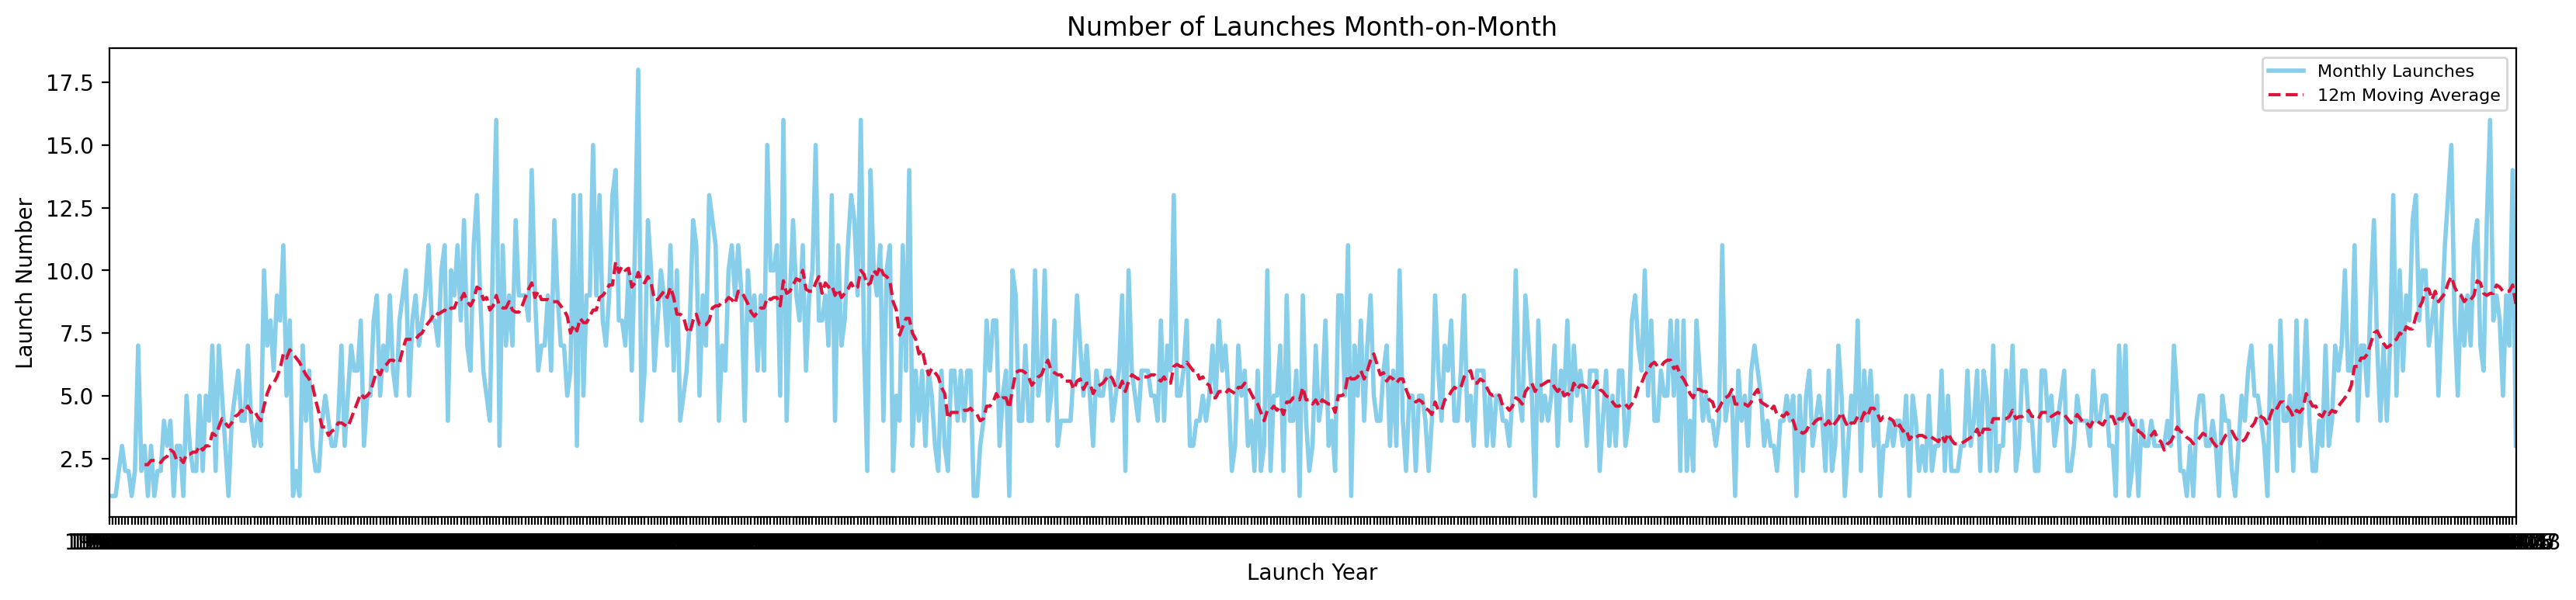

In [641]:
plt.figure(figsize=(20,4),dpi=200)
plt.title('Number of Launches Month-on-Month')

ax = plt.gca()
ax.set_ylabel('Launch Number')
ax.set_xlabel('Launch Year')

ax.plot(launch_monthly.launch_time, launch_monthly.Mission_Status,c='skyblue',linewidth=2,label="Monthly Launches")
ax.plot(roll_monthly.index,roll_monthly.values,c='crimson',linestyle='--',label='12m Moving Average')
ax.set_xlim(roll_monthly.index.min(), roll_monthly.index.max())
plt.legend(fontsize=8)


# Launches per Month: Which months are most popular and least popular for launches?

Some months have better weather than others. Which time of year seems to be best for space missions?

In [642]:
df_data['launch_month'] = df_data.Date.dt.month

In [643]:
month_dis = df_data.launch_month.value_counts()
month_dis

12    450
6     402
4     383
10    381
8     373
9     365
3     353
7     351
2     336
11    335
5     326
1     268
Name: launch_month, dtype: int64

In [644]:
fig = px.bar(x=month_dis.index, y=month_dis.values,title='Which months are most popular and least popular for launches')
fig.update_layout(xaxis_title='Month',yaxis_title='Number of Launches')
fig.show()

December is the most popular while January is the least popular month to launch.

# How has the Launch Price varied Over Time? 

Create a line chart that shows the average price of rocket launches over time. 

In [645]:
price_year = df_data[['Price','launch_year']]
price_by_year=price_year.groupby('launch_year',as_index=False).agg({'Price':'mean'})
price_by_year

,launch_year,Price
0,1957,62.00
1,1958,62.00
2,1959,62.00
3,1960,62.00
4,1961,62.00
...,...,...
59,2016,74.41
60,2017,67.37
61,2018,64.07
62,2019,60.40


In [646]:
fig = px.line(price_by_year,x='launch_year', y='Price',title=' Launch Price varied Over Time')
fig.update_layout(xaxis_title='Year',yaxis_title='Launch Expense')
fig.show()

# Chart the Number of Launches over Time by the Top 10 Organisations. 

How has the dominance of launches changed over time between the different players? 

In [647]:
year_org_launch = df_data.groupby(['Organisation','launch_year'],as_index=False).agg({'Mission_Status':'count'}).sort_values('Mission_Status')
year_org_launch

,Organisation,launch_year,Mission_Status
0,AEB,1997,1
278,ISRO,2006,1
277,ISRO,2005,1
276,ISRO,2004,1
274,ISRO,2002,1
...,...,...,...
510,RVSN USSR,1970,87
515,RVSN USSR,1975,89
511,RVSN USSR,1971,93
516,RVSN USSR,1976,95


In [648]:
top_10=org_dis[-10:]
org = np.array(top_10.Organisation)
org

array(['Martin Marietta', 'Boeing', 'ULA', 'US Air Force', 'VKS RF',
       'NASA', 'CASC', 'General Dynamics', 'Arianespace', 'RVSN USSR'],
      dtype=object)

In [649]:
year_org_launch_10 = year_org_launch[year_org_launch.Organisation.isin(org)]
year_org_launch_10.rename(columns={'Mission_Status':'Number'},inplace=True)
year_org_launch_10

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Organisation,launch_year,Number
200,General Dynamics,1995,1
194,General Dynamics,1989,1
535,RVSN USSR,1998,1
534,RVSN USSR,1996,1
533,RVSN USSR,1995,1
...,...,...,...
510,RVSN USSR,1970,87
515,RVSN USSR,1975,89
511,RVSN USSR,1971,93
516,RVSN USSR,1976,95


In [650]:
cum_mission = year_org_launch_10.groupby(['Organisation','launch_year'],as_index=False).sum()
cum_mission['cum_mission'] = cum_mission.groupby('Organisation')['Number'].cumsum()

In [651]:
cum_mission

,Organisation,launch_year,Number,cum_mission
0,Arianespace,1984,3,3
1,Arianespace,1985,4,7
2,Arianespace,1986,3,10
3,Arianespace,1987,2,12
4,Arianespace,1988,6,18
...,...,...,...,...
318,VKS RF,2016,4,179
319,VKS RF,2017,6,185
320,VKS RF,2018,5,190
321,VKS RF,2019,8,198


In [652]:
fig = px.line(cum_mission, x='launch_year',y='cum_mission', color='Organisation',title='Number of Launches over Time by the Top 10 Organisations')
fig.update_layout(xaxis_title='Launch Year', yaxis_title='Cumulation of Missions')
fig.show()

# Cold War Space Race: USA vs USSR

The cold war lasted from the start of the dataset up until 1991. 

In [695]:
cw_data = df_data.query('Date <=1991')
cw_data

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Place,ISO,launch_year,launch_time,launch_month
1776,RVSN USSR,"Site 32/2, Plesetsk Cosmodrome, Russia",1990-12-22,Tsyklon-3 | Cosmos 2114 to 2119,StatusRetired,62.00,Success,Russian Federation,RUS,1990,1990-12,12
1777,RVSN USSR,"Site 133/3, Plesetsk Cosmodrome, Russia",1990-12-10,Cosmos-3M (11K65M) | Cosmos 2112,StatusRetired,62.00,Success,Russian Federation,RUS,1990,1990-12,12
1778,RVSN USSR,"Site 90/20, Baikonur Cosmodrome, Kazakhstan",1990-12-04,Tsyklon-2 | Cosmos 2107,StatusRetired,62.00,Success,Kazakhstan,KAZ,1990,1990-12,12
1779,NASA,"LC-39B, Kennedy Space Center, Florida, USA",1990-12-02,Space Shuttle Columbia | STS-35,StatusRetired,450.00,Success,USA,USA,1990,1990-12,12
1780,General Dynamics,"SLC-3W, Vandenberg AFB, California, USA",1990-12-01,Atlas-E/F Star-37S-ISS | DMSP F-10,StatusRetired,62.00,Success,USA,USA,1990,1990-12,12
...,...,...,...,...,...,...,...,...,...,...,...,...
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1958-02-05,Vanguard | Vanguard TV3BU,StatusRetired,62.00,Failure,USA,USA,1958,1958-02,2
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",1958-02-01,Juno I | Explorer 1,StatusRetired,62.00,Success,USA,USA,1958,1958-02,2
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1957-12-06,Vanguard | Vanguard TV3,StatusRetired,62.00,Failure,USA,USA,1957,1957-12,12
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-11-03,Sputnik 8K71PS | Sputnik-2,StatusRetired,62.00,Success,Kazakhstan,KAZ,1957,1957-11,11


## Create a Plotly Pie Chart comparing the total number of launches of the USSR and the USA

Hint: Remember to include former Soviet Republics like Kazakhstan when analysing the total number of launches. 

In [703]:
USSR_USA = cw_data.query('ISO =="RUS" or ISO == "USA" or ISO == "KAZ"')

USSR_USA.head()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Place,ISO,launch_year,launch_time,launch_month
1776,RVSN USSR,"Site 32/2, Plesetsk Cosmodrome, Russia",1990-12-22,Tsyklon-3 | Cosmos 2114 to 2119,StatusRetired,62.00,Success,Russian Federation,RUS,1990,1990-12,12
1777,RVSN USSR,"Site 133/3, Plesetsk Cosmodrome, Russia",1990-12-10,Cosmos-3M (11K65M) | Cosmos 2112,StatusRetired,62.00,Success,Russian Federation,RUS,1990,1990-12,12
1778,RVSN USSR,"Site 90/20, Baikonur Cosmodrome, Kazakhstan",1990-12-04,Tsyklon-2 | Cosmos 2107,StatusRetired,62.00,Success,Kazakhstan,KAZ,1990,1990-12,12
1779,NASA,"LC-39B, Kennedy Space Center, Florida, USA",1990-12-02,Space Shuttle Columbia | STS-35,StatusRetired,450.00,Success,USA,USA,1990,1990-12,12
1780,General Dynamics,"SLC-3W, Vandenberg AFB, California, USA",1990-12-01,Atlas-E/F Star-37S-ISS | DMSP F-10,StatusRetired,62.00,Success,USA,USA,1990,1990-12,12


In [704]:
def con(x):
  if x =='KAZ':return'RUS'
  else: return x
USSR_USA.ISO = USSR_USA.ISO.apply(con)


/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [705]:
vs = USSR_USA.ISO.value_counts()
vs

RUS    1741
USA     644
Name: ISO, dtype: int64

In [709]:
fig=px.pie(vs,values=vs.values,names=vs.index, color = vs.index,title='Total number of launches of the USSR and the USA')

fig.update_traces(textposition='inside', textinfo='percent+value')
fig.show()

## Create a Chart that Shows the Total Number of Launches Year-On-Year by the Two Superpowers

In [712]:
year_vs = USSR_USA.groupby(['ISO','launch_year'],as_index=False).agg({'Mission_Status':'count'})
year_vs

,ISO,launch_year,Mission_Status
0,RUS,1957,2
1,RUS,1958,5
2,RUS,1959,4
3,RUS,1960,9
4,RUS,1961,9
...,...,...,...
63,USA,1986,6
64,USA,1987,6
65,USA,1988,7
66,USA,1989,16


In [713]:
fig = px.line(year_vs, x='launch_year', y='Mission_Status', color='ISO',title='Total Number of Launches Year-On-Year')
fig.update_layout(xaxis_title='Launch Year',yaxis_title='Amount')
fig.show()

## Chart the Total Number of Mission Failures Year on Year.

In [720]:
f_vs = USSR_USA.query('Mission_Status != "Success"')
f_vs

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Place,ISO,launch_year,launch_time,launch_month
1795,RVSN USSR,"Site 45/2, Baikonur Cosmodrome, Kazakhstan",1990-10-04,Zenit-2 | Tselina-2 n†­8,StatusRetired,62.00,Failure,Kazakhstan,RUS,1990,1990-10,10
1816,RVSN USSR,"Site 43/3, Plesetsk Cosmodrome, Russia",1990-06-21,Molniya-M /Block 2BL | Cosmos 2084,StatusRetired,62.00,Partial Failure,Russian Federation,RUS,1990,1990-06,6
1837,Martin Marietta,"SLC-40, Cape Canaveral AFS, Florida, USA",1990-03-14,Commercial Titan III | Intelsat 603,StatusRetired,136.60,Failure,USA,USA,1990,1990-03,3
1885,RVSN USSR,"Site 32/2, Plesetsk Cosmodrome, Russia",1989-06-09,Tsyklon-3 | Okean 2a,StatusRetired,62.00,Failure,Russian Federation,RUS,1989,1989-06,6
1930,Martin Marietta,"SLC-40, Cape Canaveral AFS, Florida, USA",1988-09-02,Titan 34D | USA-31 (Vortex),StatusRetired,62.00,Partial Failure,USA,USA,1988,1988-09,9
...,...,...,...,...,...,...,...,...,...,...,...,...
4314,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1958-04-28,Vanguard | Vanguard TV5,StatusRetired,62.00,Failure,USA,USA,1958,1958-04,4
4315,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1958-04-27,Sputnik 8A91 | Sputnik-3 #1,StatusRetired,62.00,Failure,Kazakhstan,RUS,1958,1958-04,4
4318,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",1958-03-05,Juno I | Explorer 2,StatusRetired,62.00,Failure,USA,USA,1958,1958-03,3
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1958-02-05,Vanguard | Vanguard TV3BU,StatusRetired,62.00,Failure,USA,USA,1958,1958-02,2


In [728]:
f_year = f_vs.groupby(['ISO','launch_year'],as_index=False).agg({'Mission_Status':'count'})
f_year.shape

(59, 3)

In [723]:
fig = px.line(f_year, x='launch_year', y='Mission_Status', color='ISO',title='Failure of Launches Year-On-Year')
fig.update_layout(xaxis_title='Launch Year',yaxis_title='FailureAmount')
fig.show()

## Chart the Percentage of Failures over Time

Did failures go up or down over time? Did the countries get better at minimising risk and improving their chances of success over time? 

In [731]:
f_year.rename(columns={'Mission_Status':'Failure_times'},inplace=True)


In [733]:
fail_per = pd.merge(year_vs,f_year,on=['launch_year','ISO'])
fail_per['f_per'] = fail_per.Failure_times/fail_per.Mission_Status
fail_per.head()

,ISO,launch_year,Mission_Status,Failure_times,f_per
0,RUS,1958,5,4,0.80
1,RUS,1959,4,2,0.50
2,RUS,1960,9,6,0.67
3,RUS,1961,9,4,0.44
4,RUS,1962,22,7,0.32


In [734]:
fig = px.line(fail_per, x='launch_year', y='f_per', color='ISO',title='Failure Percentage of Launches Year-On-Year')
fig.update_layout(xaxis_title='Launch Year',yaxis_title='Failure Per')
fig.show()

# For Every Year Show which Country was in the Lead in terms of Total Number of Launches up to and including including 2020)

Do the results change if we only look at the number of successful launches? 

In [738]:
up_df = df_data
up_df.ISO = up_df.ISO.apply(con)
up_df.head()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Place,ISO,launch_year,launch_time,launch_month
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,USA,USA,2020,2020-08,8
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China,CHN,2020,2020-08,8
2,SpaceX,"Pad A, Boca Chica, Texas, USA",2020-08-04,Starship Prototype | 150 Meter Hop,StatusActive,62.00,Success,USA,USA,2020,2020-08,8
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success,Kazakhstan,RUS,2020,2020-07,7
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30,Atlas V 541 | Perseverance,StatusActive,145.00,Success,USA,USA,2020,2020-07,7


In [739]:
lead_df =up_df.groupby(['ISO','launch_year'],as_index=False).agg({'Mission_Status':'count'})
lead_df

,ISO,launch_year,Mission_Status
0,AUS,1967,1
1,AUS,1968,1
2,AUS,1969,1
3,AUS,1970,2
4,AUS,1971,1
...,...,...,...
348,USA,2016,27
349,USA,2017,30
350,USA,2018,34
351,USA,2019,27


In [740]:
fig = px.line(lead_df, x='launch_year', y='Mission_Status', color='ISO',title='Number of Launches Year-On-Year by countries')
fig.update_layout(xaxis_title='Launch Year',yaxis_title='Number of launches')
fig.show()

In [743]:
suc = up_df.query('Mission_Status == "Success"')
lead_suc = suc.groupby(['ISO','launch_year'],as_index=False).agg({'Mission_Status':'count'})
lead_suc.rename(columns={'Mission_Status':'Success'},inplace=True)


In [745]:
fig = px.line(lead_suc, x='launch_year', y='Success', color='ISO',title='Number of Sucessful Launches Year-On-Year by countries')
fig.update_layout(xaxis_title='Launch Year',yaxis_title='Number of Success')
fig.show()

# Create a Year-on-Year Chart Showing the Organisation Doing the Most Number of Launches

Which organisation was dominant in the 1970s and 1980s? Which organisation was dominant in 2018, 2019 and 2020? 

In [749]:
org_70_80 = df_data.query('launch_year >= 1970 and launch_year<=1989')
lead_70_80 =org_70_80.groupby(['Organisation','launch_year'],as_index=False).agg({'Mission_Status':'count'}).sort_values('Mission_Status')
lead_70_80

,Organisation,launch_year,Mission_Status
0,ASI,1970,1
83,ISRO,1981,1
82,ISRO,1980,1
81,ISRO,1979,1
80,ISAS,1989,1
...,...,...,...
137,RVSN USSR,1970,87
142,RVSN USSR,1975,89
138,RVSN USSR,1971,93
143,RVSN USSR,1976,95


In [753]:
fig = px.bar(lead_70_80, x='launch_year', y='Mission_Status', color='Organisation',title='Leading Organisation in 1970s &1980s')
fig.update_layout(xaxis_title='Launch Year',yaxis_title='Number of Launches')
fig.show()

In [762]:
org_recent = df_data.query('launch_year >=2018')
org_recent_lead = org_recent.groupby(['Organisation','launch_year'],as_index=False).agg({'Mission_Status':'count'})
org_recent_lead.sort_values('Mission_Status',inplace=True)

In [765]:
fig = px.bar(org_recent_lead, x='launch_year', y='Mission_Status', color='Organisation',title='Leading Organisation in recent 3 years')
fig.update_layout(xaxis_title='Launch Year',yaxis_title='Number of Launches')
fig.show()